In [2]:
!pip install scipy numpy pandas matplotlib seaborn scikit-learn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

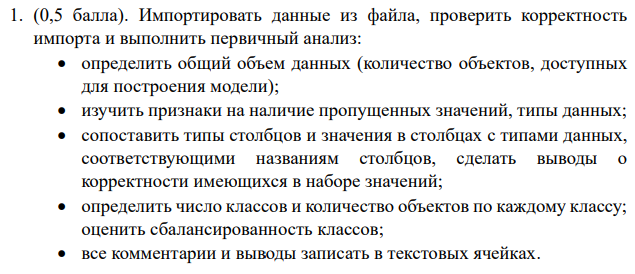

In [4]:
data = pd.read_csv('dataset.csv')
data.head()

,ID клиента,Возраст,Цель поездки,Класс обслуживания,Уровень удовлетворенности онлайн-регистрацией на рейс,Уровень удовлетворенности обслуживанием в полете,Задержка отправления (мин),Задержка прибытия (мин),Уровень удовлетворенности временем отправления и прибытия,Уровень удовлетворенности клиента
0,11996,52.0,Частная,Эконом,0,4,0,0.0,5,Удовлетворен
1,63021,30.0,Деловая,Бизнес,5,5,2,0.0,1,Удовлетворен
2,104939,40.0,Деловая,Бизнес,5,5,3,0.0,1,Удовлетворен
3,59058,71.0,Деловая,Эконом,2,2,3,11.0,2,Не удовлетворен
4,13113,25.0,Деловая,Эконом,3,1,2,0.0,4,Не удовлетворен


In [5]:
rows, cols = data.shape 
print(f'Количество cтрок: {rows}')
print(f'Количество колонок: {cols}')

Количество cтрок: 1000
Количество колонок: 10


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   ID клиента                                                 1000 non-null   int64  
 1   Возраст                                                    897 non-null    float64
 2   Цель поездки                                               985 non-null    object 
 3   Класс обслуживания                                         1000 non-null   object 
 4   Уровень удовлетворенности онлайн-регистрацией на рейс      1000 non-null   int64  
 5   Уровень удовлетворенности обслуживанием в полете           1000 non-null   int64  
 6   Задержка отправления (мин)                                 1000 non-null   int64  
 7   Задержка прибытия (мин)                                    1000 non-null   float64
 8   Уровень удовле

In [7]:
data.isnull().sum()

ID клиента                                                     0
Возраст                                                      103
Цель поездки                                                  15
Класс обслуживания                                             0
Уровень удовлетворенности онлайн-регистрацией на рейс          0
Уровень удовлетворенности обслуживанием в полете               0
Задержка отправления (мин)                                     0
Задержка прибытия (мин)                                        0
Уровень удовлетворенности временем отправления и прибытия      0
Уровень удовлетворенности клиента                              0
dtype: int64

ID клиента - int64 - правильно  
Возраст - float64 - правильно
Цель поездки - object(str) -  правильно
Класс обслуживания - object - правильно
Уровень удовлетворенности онлайн-регистрацией на рейс -   int64 - правильно  
Уровень удовлетворенности обслуживанием в полете - int64 - правильно  
Задержка отправления (мин) - int64 - **ВОЗМОЖНО неправильно, т.к. ВСЕ клиенты не могут задержаться на ровно целое число секунд или это слишком маловероятно**  
Задержка прибытия (мин) - float64 - **ВОЗМОЖНО также не правильно так как все значения могут быть целыми**
Уровень удовлетворенности временем отправления и прибытия - int64  - верно
Уровень удовлетворенности клиента - object - верно 

Пропуски есть в столбце "Возраст"(10.3%) и "Цель поездки"(0.15%). Эти пропуски в дальнейшем нужно обработать: Для возраста можно испольовать среднее знч.\медиану, для цели поездки - модой, или удалением строк, т.к. их очень мало 

In [8]:
check_cols = ["Цель поездки", "Класс обслуживания", "Уровень удовлетворенности клиента"]
for col in check_cols:
    print(f'Уникальные значение для "{col}"', data[col].unique())
    
print('Всё ли дробь в "Задержка прибытия":', (data['Задержка прибытия (мин)'] % 1 != 0).sum())
print('Всё ли дробь в "Возраст":', (data['Возраст'] % 1 != 0).sum())
    

Уникальные значение для "Цель поездки" ['Частная' 'Деловая' nan]
Уникальные значение для "Класс обслуживания" ['Эконом' 'Бизнес' 'Комфорт']
Уникальные значение для "Уровень удовлетворенности клиента" ['Удовлетворен' 'Не удовлетворен']
Всё ли дробь в "Задержка прибытия": 0
Всё ли дробь в "Возраст": 103


Вывод:

- Уникальные значение для "Цель поездки" ['Частная' 'Деловая' nan] -> Значения логичны, но пропуски нужно обработать
- Уникальные значение для "Класс обслуживания" ['Эконом' 'Бизнес' 'Комфорт'] -> Всё корректно
- Уникальные значение для "Уровень удовлетворенности клиента" ['Удовлетворен' 'Не удовлетворен'] -> Всё корректно
- Всё ли дробь в "Задержка прибытия": 0 -- сл-но аномалия, так как заявлена дробное значение а все ячейки целые числа
- Всё ли дробь в "Возраст": 103 -- сл-но все нормально, возраст удовлетворяет условию типа данных колонки

In [9]:
print(10 % 1 == 0, 10 % 1)
print(10.5 % 1 == 0, 10.5 % 1)
print(10.5 / 1 == 0, 10.5 / 1)
print(10.5 // 1 == 0, 10.5 // 1)

True 0
False 0.5
False 10.5
False 10.0


## 5. Определение числа классов и их распределение

In [10]:
classes_cols = ["Цель поездки", "Класс обслуживания", "Уровень удовлетворенности клиента"]
for col in classes_cols:
    class_counts = data[col].value_counts()
    display(class_counts)

    # сбалансированность
    class_prop =  class_counts / class_counts.sum()
    print('Доля кадого класса:')
    display(class_prop)

Цель поездки
Деловая    717
Частная    268
Name: count, dtype: int64

Доля кадого класса:


Цель поездки
Деловая    0.727919
Частная    0.272081
Name: count, dtype: float64

Класс обслуживания
Бизнес     519
Эконом     414
Комфорт     67
Name: count, dtype: int64

Доля кадого класса:


Класс обслуживания
Бизнес     0.519
Эконом     0.414
Комфорт    0.067
Name: count, dtype: float64

Уровень удовлетворенности клиента
Удовлетворен       500
Не удовлетворен    500
Name: count, dtype: int64

Доля кадого класса:


Уровень удовлетворенности клиента
Удовлетворен       0.5
Не удовлетворен    0.5
Name: count, dtype: float64

## 3 пункт - сопоставление типов и значений

**Что делаю**: Проверяю уникальные значения категориальных столбцов, чтобы убедиться, что они соответствуют ожиданиям. Также проверяю, есть ли дробные значения в столбцах Возраст и Задержка прибытия, чтобы оценить корректность их типов данных.

Цель поездки  ~73%-деловая ~27%-частная. Классы не сбалансированны, что не подойдет для моделирования. Большое отклонение, сл-но требуется методы балансировки

Класс обслуживания - 52%-бизнес 41%-Эконом 7%-комфорт - классы не сбалансирован, возможно потребуется балансировка

Уровень удовлетворенности клиента - 50%-удовлетворен, 50%-не удовлетворен - класс полностью сбалансирован

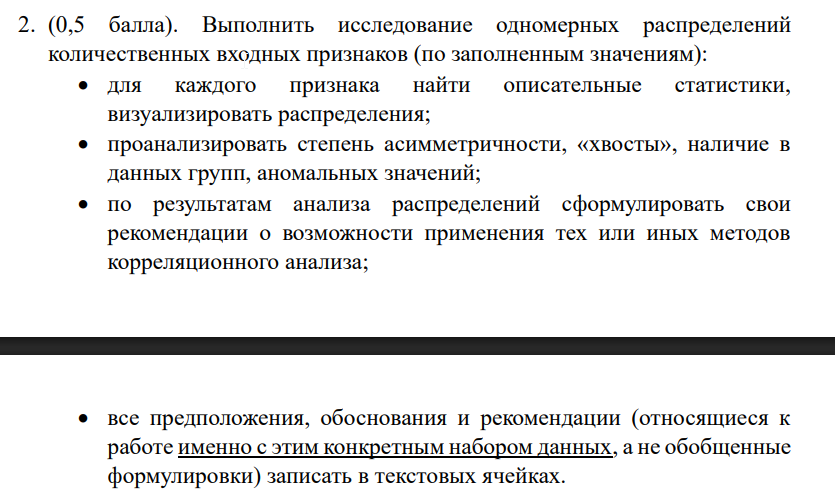

Количественными параметрами являются ["Возраст", "Задержка отправления(мин)", "Задержка прибытия(мин)"]

In [11]:
counts_colums = ["Возраст", "Задержка прибытия (мин)", "Задержка отправления (мин)"]

In [12]:
data[counts_colums].describe()

,Возраст,Задержка прибытия (мин),Задержка отправления (мин)
count,897.000000,1000.000000,1000.000000
mean,40.096990,16.872000,16.293000
std,14.841069,45.350439,44.163147
min,7.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000
50%,40.000000,0.000000,0.000000
75%,51.000000,14.000000,12.000000
max,80.000000,518.000000,450.000000


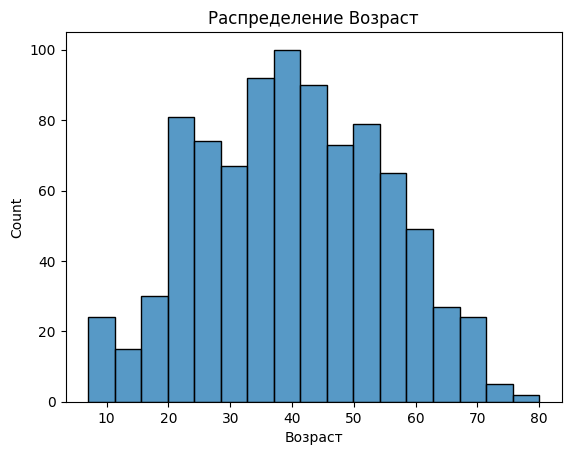

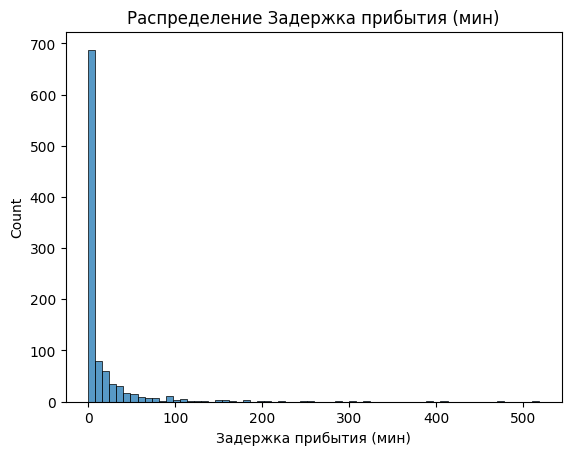

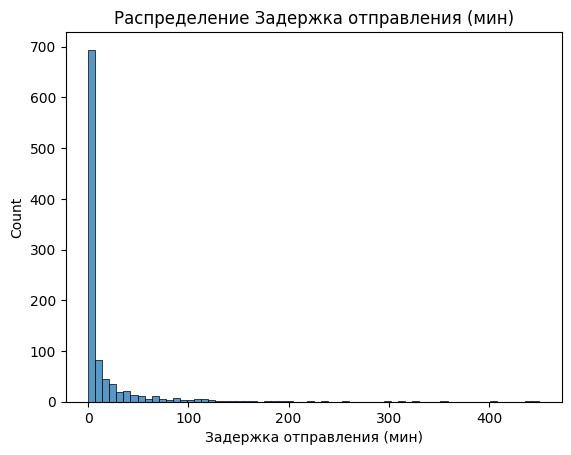

In [13]:
for col in counts_colums:
    sns.histplot(data[col])
    plt.title(f"Распределение {col}")
    plt.xlabel(f"{col}")
    plt.show()

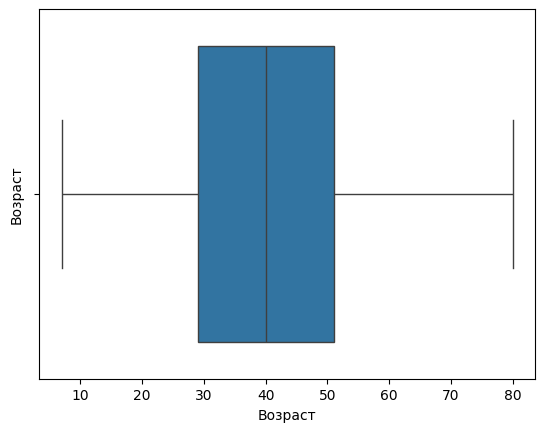

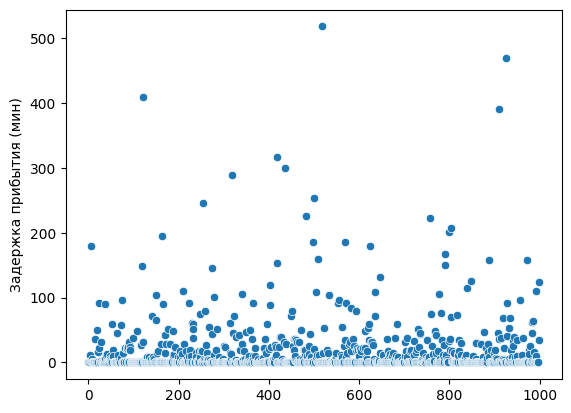

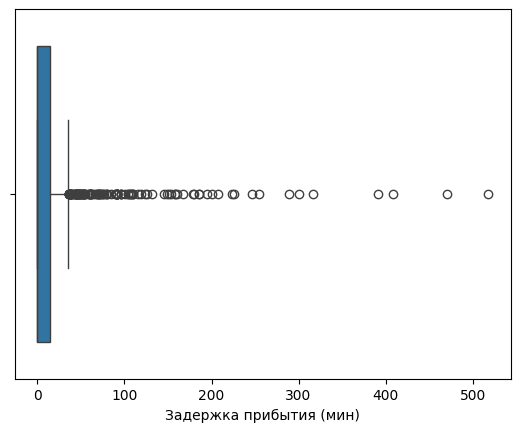

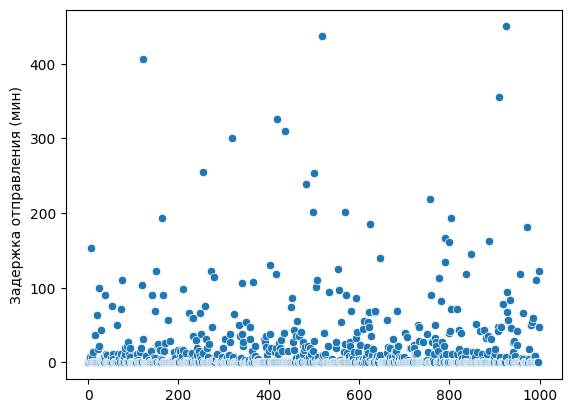

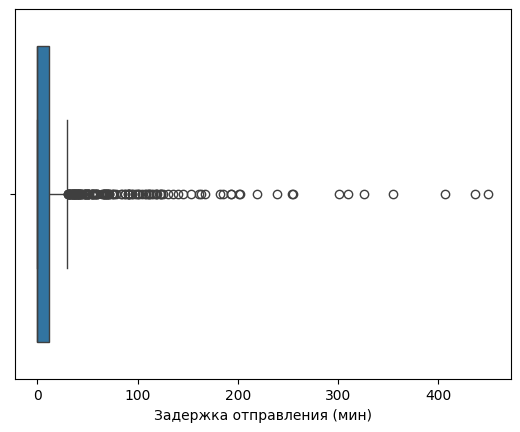

In [14]:
sns.boxplot(data["Возраст"], orient='y')
plt.ylabel(f"Возраст")
plt.show()
for col in counts_colums[1:]:
    sns.scatterplot(data[col])
    plt.ylabel(f"{col}")
    plt.show()
    sns.boxplot(data[col], orient='y')
    plt.xlabel(f"{col}")
    plt.show()

## Возраст

Медиана находится примерно на уровне 30–40 лет . Это центральное значение распределения.

Если судить по боксблоту то
- Медиана находится в рйоне 40 лет
- Первый квартиль (Q1) находится около 20–30 лет
- Третий квартиль (Q3) находится около 40–50 лет

Ассимтрия: 
- Распределение имеет правостороннюю ассиметрию(положительную). Это видно по тому, что верхний ус длинее нижнего. 

Выбросы:
- Отсутствуют

Выводы:
- Возраст распределен равномерно, с большой концентрацией в молодом и среднем возрасте
- Присутствует правосторонняя ассиметрия
- От выбросов очищать не нужно

Рекомендации:
- Для кореляции можно использовать метод Пирсона

## Задержка прибытия (мин)

Болшенство значений находится в районе 0-5 минут. Это видно по плотной концентрации на гистрограмме, по оси Y

Есть значительные выбросы которые значительно отличаются от основной массы данных. От 40 и выше минут считается выбросами и сильно выделяются на фоне основного распределения

Ассимтрия: 
- Распределение имеет правостороннюю ассиметрию(положительную). Так как большинство значений находится в левой части гистограммы, а длинный хвост присутствует в правой части

Выбросы:
- Много выбросов от 40 минут и выше

Выводы:
- Задержки прибытия имеют высокую вариантивность
- Присутствуют значитльные выбросы, которые могут искажать анализ данных
- Распределение сильно ассиметрично

Рекомендации:
- Удалить выбросы от 40 минут
- Из за наличия ассиметрии рекомендуется использовать корреляцию Спирмена вместо Пирсона

# [Теория] Какую кореляцию выбрать и в каких случаях

Корреляция - это взаимосвязь между различными показателями в статистике. Она показывает насколько изменени одной переменной влияет на изменение другой.

# Основные методы

## Корреляция Пирсона
- Мера линейной связи между 2 переменными 
- Диапазон значений от -1(Полная обратная зависимость) до +1(Полная прямая зависимость)

Когда использовать? 

1) Данные имеют нормальное распределение
2) Предполагается линейная связь между переменными
3) Нет выбросов или они уже обработаны

## Корреляция Спирмена
- Мера монотонной(не обязательно линейная) связи между 2 переменными, основанная на рангах
- Диапазон значений от -1(Полная обратная зависимость) до +1(Полная прямая зависимость)

Когда использовать? 

1) Данные не имеют нормальное распределение
2) Предполагается монотонная связь (убывает или возрастает), но не обязательно линейная
3) Присутствуют выбросы или аномальные значения

## Корреляция Кендала
- Мера согласованности порядков 2 переменных. Основана на подсчете пар, которые согласованы или несогласованы по порядку 
- Диапазон значений от -1(Полная обратная зависимость) до +1(Полная прямая зависимость)

Когда использовать? 

1) Данные содержат много повторяющися значения(ранговая корреляция)
2) Маленький размер выборки
3) Важна интерпритация согласованности порядков(например в категориальных данных) (другими словами показывает насколько две переменные "ведут себя одинакого" с точки зрения их ранжирования(ранга))


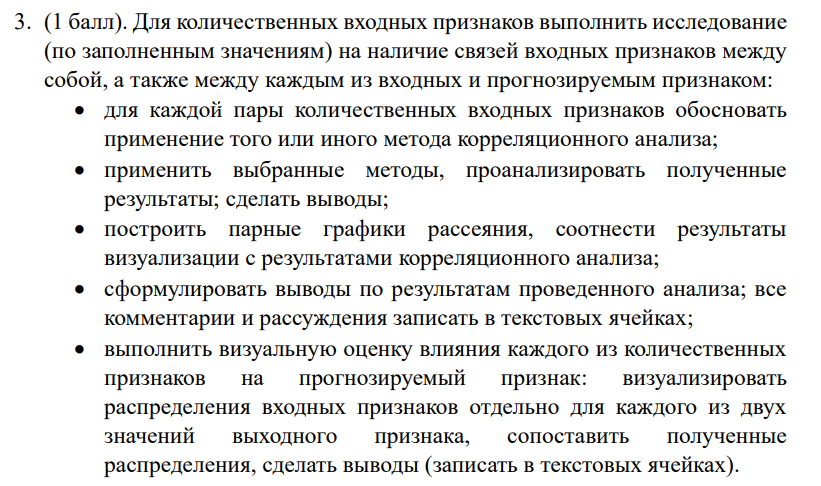

In [15]:
data.head()

,ID клиента,Возраст,Цель поездки,Класс обслуживания,Уровень удовлетворенности онлайн-регистрацией на рейс,Уровень удовлетворенности обслуживанием в полете,Задержка отправления (мин),Задержка прибытия (мин),Уровень удовлетворенности временем отправления и прибытия,Уровень удовлетворенности клиента
0,11996,52.0,Частная,Эконом,0,4,0,0.0,5,Удовлетворен
1,63021,30.0,Деловая,Бизнес,5,5,2,0.0,1,Удовлетворен
2,104939,40.0,Деловая,Бизнес,5,5,3,0.0,1,Удовлетворен
3,59058,71.0,Деловая,Эконом,2,2,3,11.0,2,Не удовлетворен
4,13113,25.0,Деловая,Эконом,3,1,2,0.0,4,Не удовлетворен


In [16]:
data.describe()

,ID клиента,Возраст,Уровень удовлетворенности онлайн-регистрацией на рейс,Уровень удовлетворенности обслуживанием в полете,Задержка отправления (мин),Задержка прибытия (мин),Уровень удовлетворенности временем отправления и прибытия
count,1000.000000,897.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,64669.480000,40.096990,3.30400,3.640000,16.293000,16.872000,3.014000
std,36975.879911,14.841069,1.36288,1.190722,44.163147,45.350439,1.539537
min,83.000000,7.000000,0.00000,1.000000,0.000000,0.000000,0.000000
25%,31915.750000,29.000000,2.00000,3.000000,0.000000,0.000000,2.000000
50%,65966.500000,40.000000,4.00000,4.000000,0.000000,0.000000,3.000000
75%,96103.500000,51.000000,4.00000,5.000000,12.000000,14.000000,4.000000
max,129528.000000,80.000000,5.00000,5.000000,450.000000,518.000000,5.000000


In [17]:
formated_data = data.copy()

formated_data["Уровень удовлетворенности клиента"] = formated_data[
    "Уровень удовлетворенности клиента"
].map({"Удовлетворен": 1, "Не удовлетворен": 0})


formated_data.head()

,ID клиента,Возраст,Цель поездки,Класс обслуживания,Уровень удовлетворенности онлайн-регистрацией на рейс,Уровень удовлетворенности обслуживанием в полете,Задержка отправления (мин),Задержка прибытия (мин),Уровень удовлетворенности временем отправления и прибытия,Уровень удовлетворенности клиента
0,11996,52.0,Частная,Эконом,0,4,0,0.0,5,1
1,63021,30.0,Деловая,Бизнес,5,5,2,0.0,1,1
2,104939,40.0,Деловая,Бизнес,5,5,3,0.0,1,1
3,59058,71.0,Деловая,Эконом,2,2,3,11.0,2,0
4,13113,25.0,Деловая,Эконом,3,1,2,0.0,4,0


In [18]:

quant_features = list(formated_data.describe().columns)
quant_features

['ID клиента',
 'Возраст',
 'Уровень удовлетворенности онлайн-регистрацией на рейс',
 'Уровень удовлетворенности обслуживанием в полете',
 'Задержка отправления (мин)',
 'Задержка прибытия (мин)',
 'Уровень удовлетворенности временем отправления и прибытия',
 'Уровень удовлетворенности клиента']

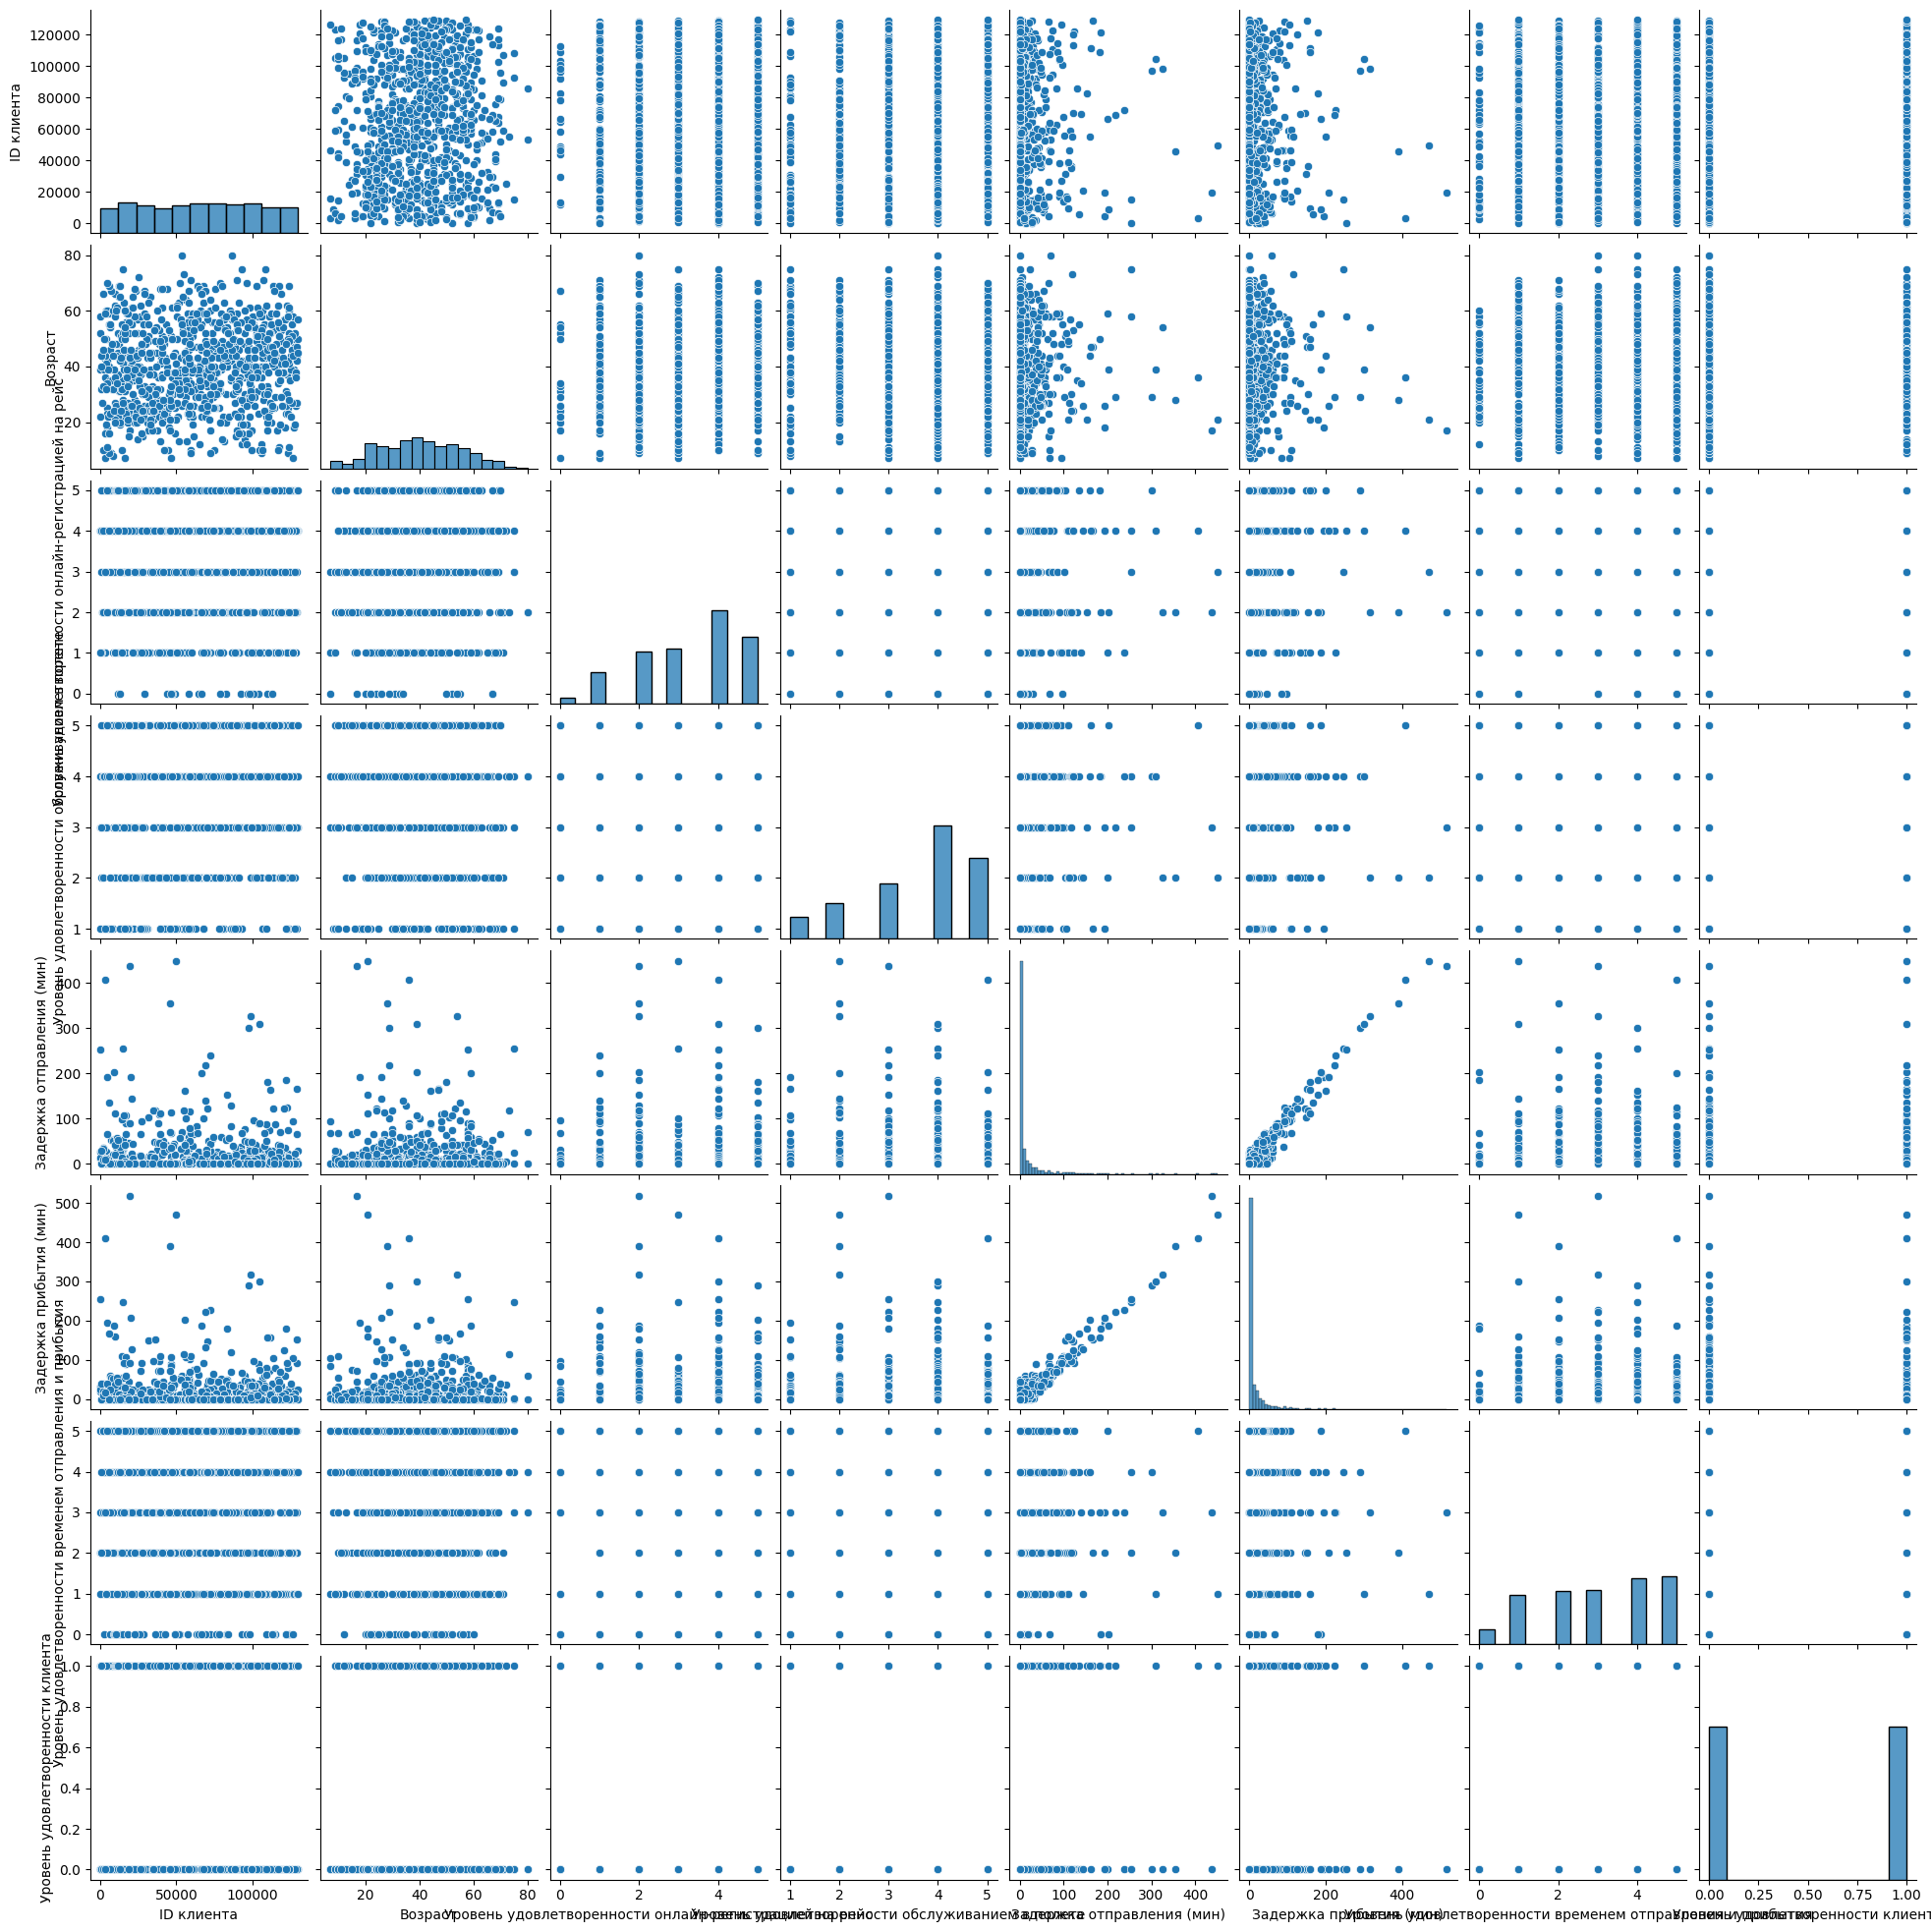

In [19]:
sns.pairplot(formated_data[quant_features])

# Пирсон

In [20]:
correlation_matrix_pearson = formated_data[quant_features].corr(method='pearson')
correlation_matrix_pearson

,ID клиента,Возраст,Уровень удовлетворенности онлайн-регистрацией на рейс,Уровень удовлетворенности обслуживанием в полете,Задержка отправления (мин),Задержка прибытия (мин),Уровень удовлетворенности временем отправления и прибытия,Уровень удовлетворенности клиента
ID клиента,1.000000,0.043720,0.075772,0.100647,-0.031511,-0.043591,-0.014540,0.046051
Возраст,0.043720,1.000000,0.165137,0.004333,-0.015351,-0.032028,0.054966,0.142871
Уровень удовлетворенности онлайн-регистрацией на рейс,0.075772,0.165137,1.000000,0.116236,-0.066375,-0.069934,0.111991,0.487447
Уровень удовлетворенности обслуживанием в полете,0.100647,0.004333,0.116236,1.000000,-0.062656,-0.074966,0.052443,0.322655
Задержка отправления (мин),-0.031511,-0.015351,-0.066375,-0.062656,1.000000,0.977785,-0.023617,-0.039532
Задержка прибытия (мин),-0.043591,-0.032028,-0.069934,-0.074966,0.977785,1.000000,-0.030498,-0.049021
Уровень удовлетворенности временем отправления и прибытия,-0.014540,0.054966,0.111991,0.052443,-0.023617,-0.030498,1.000000,-0.009098
Уровень удовлетворенности клиента,0.046051,0.142871,0.487447,0.322655,-0.039532,-0.049021,-0.009098,1.000000


<Axes: >

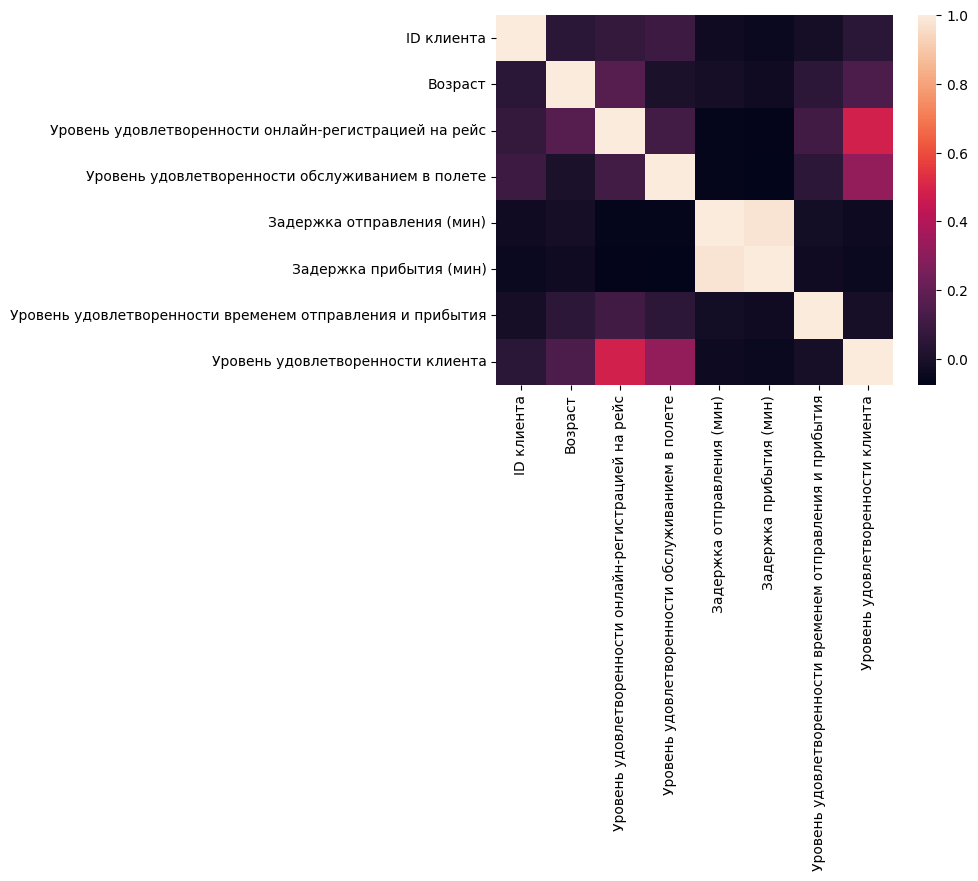

In [21]:
sns.heatmap(correlation_matrix_pearson)

# Спирман

In [22]:
correlation_matrix_spearman = formated_data[quant_features].corr(method='spearman')
correlation_matrix_spearman

,ID клиента,Возраст,Уровень удовлетворенности онлайн-регистрацией на рейс,Уровень удовлетворенности обслуживанием в полете,Задержка отправления (мин),Задержка прибытия (мин),Уровень удовлетворенности временем отправления и прибытия,Уровень удовлетворенности клиента
ID клиента,1.000000,0.052187,0.084643,0.078493,0.062144,0.009881,-0.017373,0.046405
Возраст,0.052187,1.000000,0.186282,0.028493,-0.010608,-0.015759,0.054421,0.164098
Уровень удовлетворенности онлайн-регистрацией на рейс,0.084643,0.186282,1.000000,0.147944,-0.055811,-0.098039,0.099316,0.533321
Уровень удовлетворенности обслуживанием в полете,0.078493,0.028493,0.147944,1.000000,-0.004950,-0.071110,0.055733,0.341388
Задержка отправления (мин),0.062144,-0.010608,-0.055811,-0.004950,1.000000,0.752087,-0.004031,-0.062834
Задержка прибытия (мин),0.009881,-0.015759,-0.098039,-0.071110,0.752087,1.000000,-0.004116,-0.105141
Уровень удовлетворенности временем отправления и прибытия,-0.017373,0.054421,0.099316,0.055733,-0.004031,-0.004116,1.000000,-0.004252
Уровень удовлетворенности клиента,0.046405,0.164098,0.533321,0.341388,-0.062834,-0.105141,-0.004252,1.000000


<Axes: >

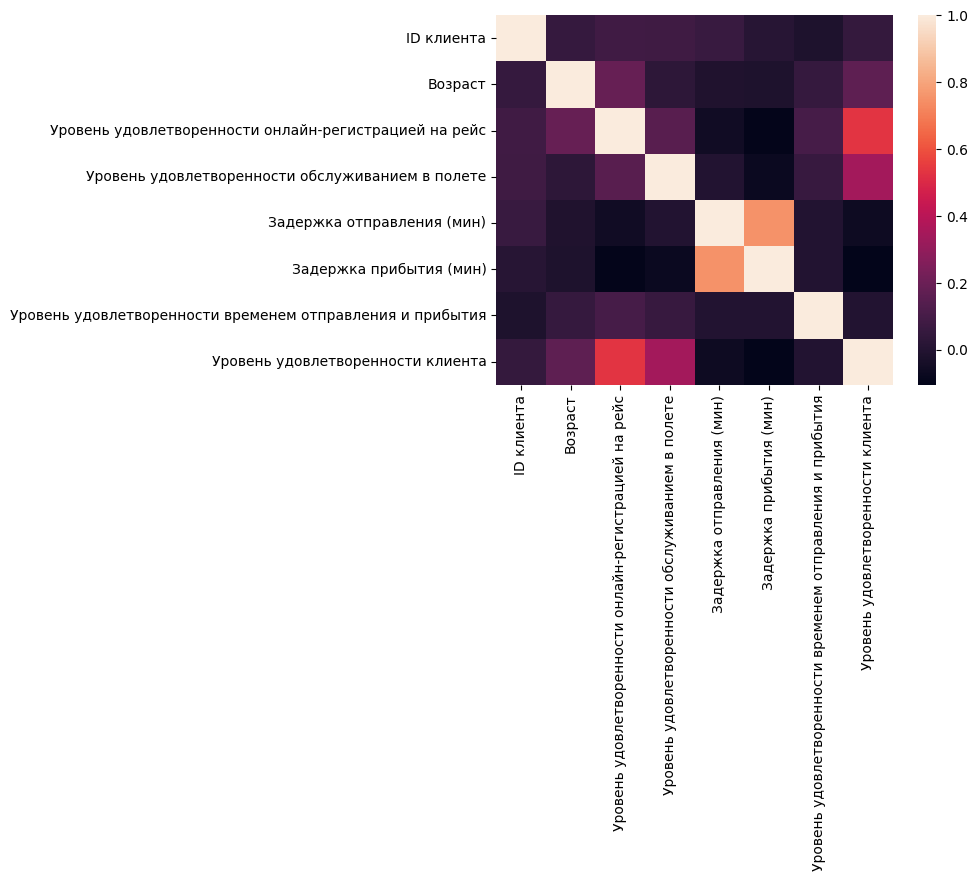

In [23]:
sns.heatmap(correlation_matrix_spearman)

In [24]:
quant_features

['ID клиента',
 'Возраст',
 'Уровень удовлетворенности онлайн-регистрацией на рейс',
 'Уровень удовлетворенности обслуживанием в полете',
 'Задержка отправления (мин)',
 'Задержка прибытия (мин)',
 'Уровень удовлетворенности временем отправления и прибытия',
 'Уровень удовлетворенности клиента']

# Анализ:
## Распределение признаков (диагональ матрицы)
- Id клиента - уникальные значения равномерно распределенные, Не несут информации для анализа
- Возраст: Большинство клиентов в возрасте от 20 до 60 лет. Распределение близко к нормальному но с небольшой правосторонней ассиметрией
- Уровень удовлетворенности онлайн-регистрацией: Оценки, сосредоточенные в диапазоне от 0 до 5. Макимальная концентрация около 4-5 баллов
- Уровень удовлетворенности обслуживание в полете: Аналогично онлайн регистрации
- Задержка отправления: Большенство значений близки к 0 но есть выбросы до 500+ минут
- Задержка прибытия: Аналогична задержке отправления но с ещё большим количеством выбросов
- Уровень удовлетворенности временем отправления и прибытия: Это оценка. сосредоточена в диапазоне от 0 до 5. Наибольшая концентрация около 4-5 баллов
- Уровень удовлетворенности клиента: Два класса. В равной степени клиенты удовлетворены и нет

## Анализ по тепловой карте
- Уровень удовлетворенности клиента -> Уровень удовлетворенности онлайн-регистрацией на рейс = составляет хороши показатель по обоим методам корреляции сл-но мы можем сделать вывод что клиенты довольные онлайн-регистрацией чаще удовлетворены авиакоманией в целом.
- Уровень удовлетворенности обслуживанием в полете -> Уровень удовлетворенности клиента = имеет достаточно умеренную связь сл-но обслуживание в полете влиет на общую удовлетворенность но меньше чем онлайн регистрация
- Задержки практическии не влияют на удовлетворение клиентов


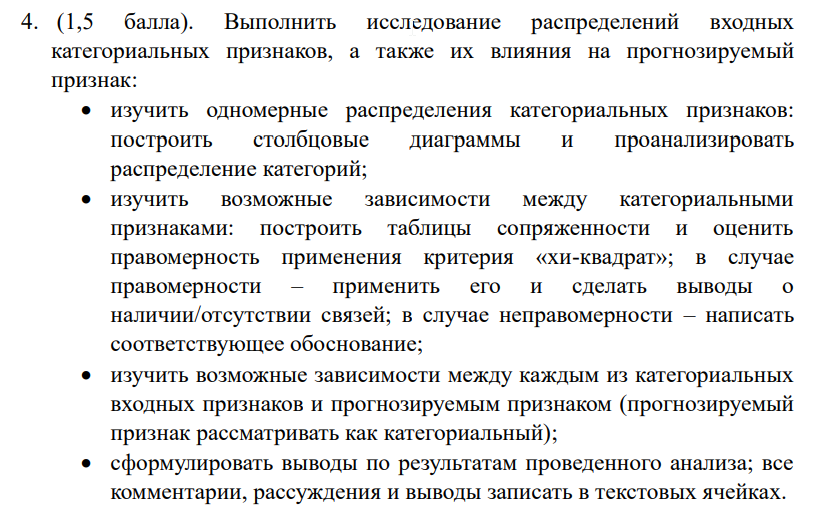

In [25]:
data.head()

,ID клиента,Возраст,Цель поездки,Класс обслуживания,Уровень удовлетворенности онлайн-регистрацией на рейс,Уровень удовлетворенности обслуживанием в полете,Задержка отправления (мин),Задержка прибытия (мин),Уровень удовлетворенности временем отправления и прибытия,Уровень удовлетворенности клиента
0,11996,52.0,Частная,Эконом,0,4,0,0.0,5,Удовлетворен
1,63021,30.0,Деловая,Бизнес,5,5,2,0.0,1,Удовлетворен
2,104939,40.0,Деловая,Бизнес,5,5,3,0.0,1,Удовлетворен
3,59058,71.0,Деловая,Эконом,2,2,3,11.0,2,Не удовлетворен
4,13113,25.0,Деловая,Эконом,3,1,2,0.0,4,Не удовлетворен


Рассмотрим 3 категориальных признака
- Цель поездки (Деловая, Частная)
- Класс обслуживания (Эконом, Бизнес, Комфорт)
- Уровень удовлетворенности клиента

In [26]:
analyze_colums = ["Цель поездки", "Класс обслуживания", "Уровень удовлетворенности клиента"]

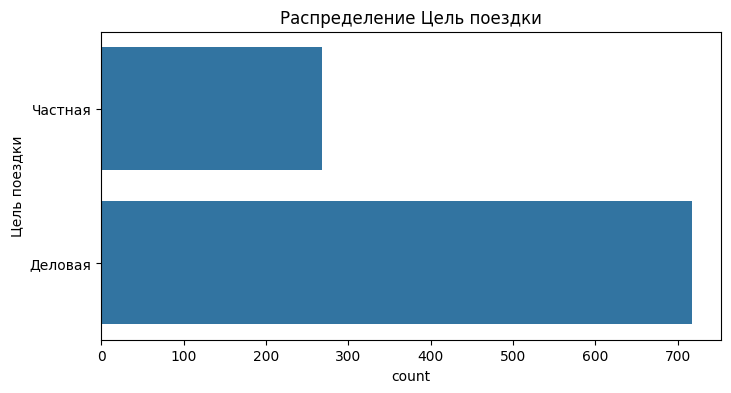

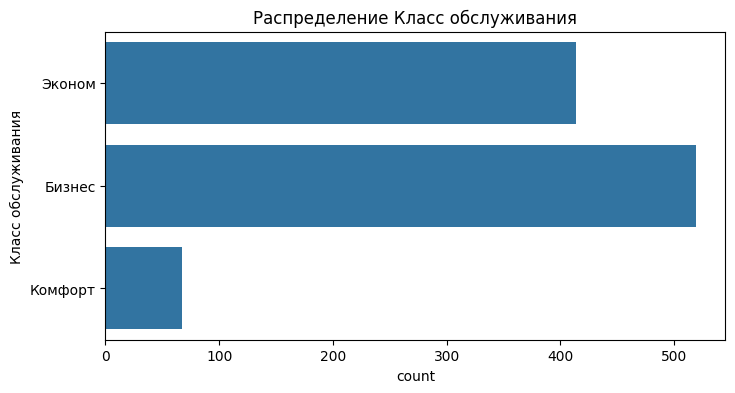

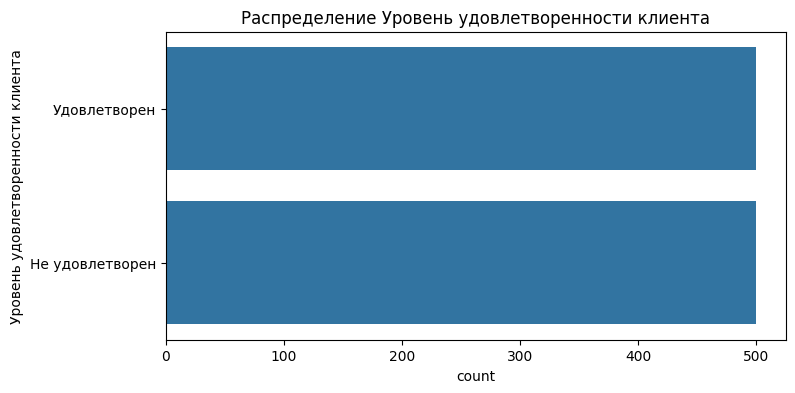

In [27]:
for col in analyze_colums:
    plt.figure(figsize=(8,4))
    sns.countplot(data[col])
    plt.title(f"Распределение {col}")
    plt.show()

- Большинство клиентов, путешествует по деловым причинам(~70%), остальные в личных целях
- По классу обслуживания преобладает Бизнес-класс (>50%) за ним уже следует Экном и самый непреобладающий это Комфорт-класс
- Клиенты удовлетворени и нет в равной степени 

In [28]:
! pip install scipy

In [29]:
import itertools
from scipy.stats import chi2_contingency

comb_columns = list(itertools.combinations(analyze_colums, 2))

for col1, col2 in comb_columns:
    cross = pd.crosstab(data[col1], data[col2])
    chi2, p, dof, expected = chi2_contingency(cross)
    display(cross)
    print(f"p-value: {p}.\nОжидаемая частота:\n{expected}")

Класс обслуживания,Бизнес,Комфорт,Эконом
Цель поездки,,,
Деловая,482,37,198
Частная,22,30,216


p-value: 4.039737966095961e-60.
Ожидаемая частота:
[[366.87106599  48.77055838 301.35837563]
 [137.12893401  18.22944162 112.64162437]]


Уровень удовлетворенности клиента,Не удовлетворен,Удовлетворен
Цель поездки,,
Деловая,263,454
Частная,233,35


p-value: 2.427461215658719e-44.
Ожидаемая частота:
[[361.04771574 355.95228426]
 [134.95228426 133.04771574]]


Уровень удовлетворенности клиента,Не удовлетворен,Удовлетворен
Класс обслуживания,,
Бизнес,136,383
Комфорт,48,19
Эконом,316,98


p-value: 6.631363822984709e-54.
Ожидаемая частота:
[[259.5 259.5]
 [ 33.5  33.5]
 [207.  207. ]]



**Класс обслуживания зависит от Цель поездки(p<0.05)**

- Клиенты с частными целями поездки больше всего летают экономом
- Клиенты с деловой целью поездки больше всего летают Бизнесом


**Уровень удовлетворенности клиента зависит от Цель поездки(p<0.05)**

- Больше всего удовлетворены клиенты с деловой целью поездки
- Не удовлетворены поездкой почти в равной степерь клиенты как деловой так и частной цели поездки


**Уровень удовлетворенности клиента зависим от Класс обслуживания(p<0.05)**
- Больше всего клиенты удовлетворены Бизнес классом
- Больше всего клиенты не удовлетворены Эконом классом


 Если p<0.05 , то признаки зависимы.

**Применимость критерия хи-квадрат**
Критерий применим,если в каждой ячейке таблицы сопряженности ожидаемоя частота > 5. В соответствии с матрицей ожидания(ожидаемых частот) критерий хи-квадрата применим

# [Теор] Когда хи2 правомерен?

Для этого мы всегда ссылаемся на 2 правила

1) Если в таблице сопряженности более 20% ячеек имеют ожидаемые частоты < 5, критерий хи-квадрат недостоверен .
2) Если есть ячейки с ожидаемыми частотами < 1, тест неприменим .

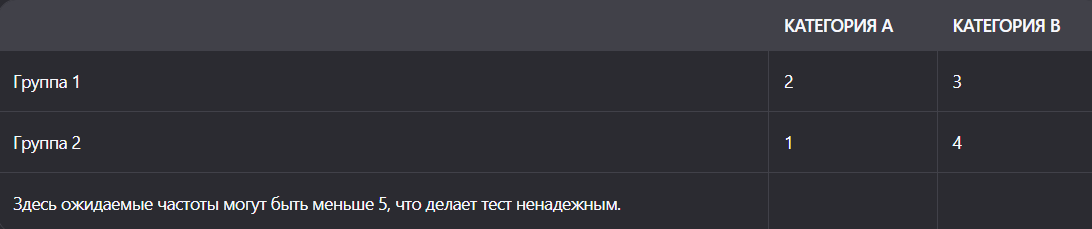

**Зависимые наблюдения**
Правило :
Хи-квадрат требует независимости наблюдений . Если данные зависимы (например, повторные измерения на тех же пациентах), тест неприменим .

Пример :
Исследование до и после лечения (зависимые группы). Для таких данных лучше использовать тест Макнемара .


**Порядковые данные**

Правило :
Хи-квадрат не учитывает порядок категорий . Если данные порядковые (например, оценка "низкий", "средний", "высокий"), тест может дать неверный результат.

Пример :
Сравнение оценок "удовлетворен" и "не удовлетворен" между группами. Для порядковых данных лучше использовать тест Манна-Уитни или тест Краскела-Уоллиса .

**Маленький размер выборки**

Правило :
При маленьком размере выборки (например, менее 20 наблюдений) хи-квадрат может давать ошибочные выводы.

Пример :
Таблица сопряженности 2x2, где общее количество наблюдений < 20.

Определение ожидаемой частоты

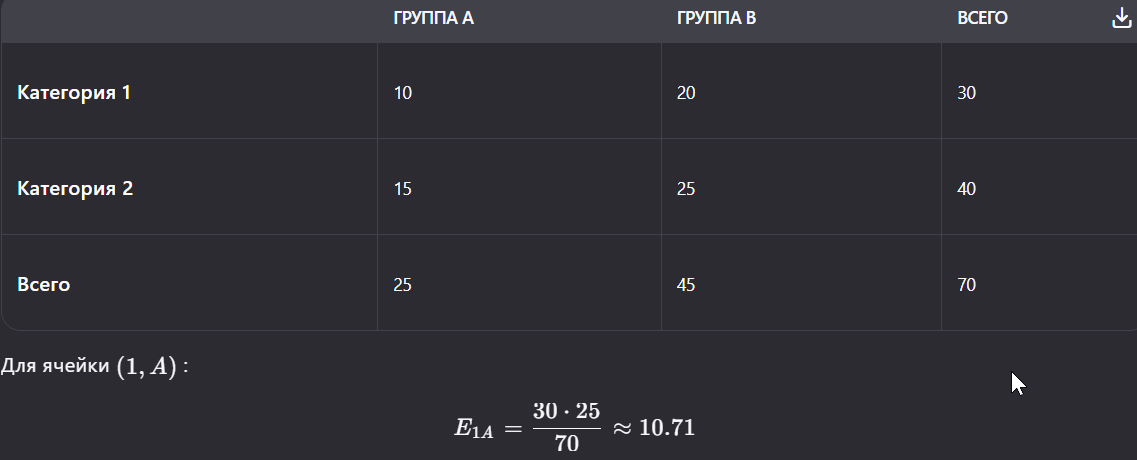

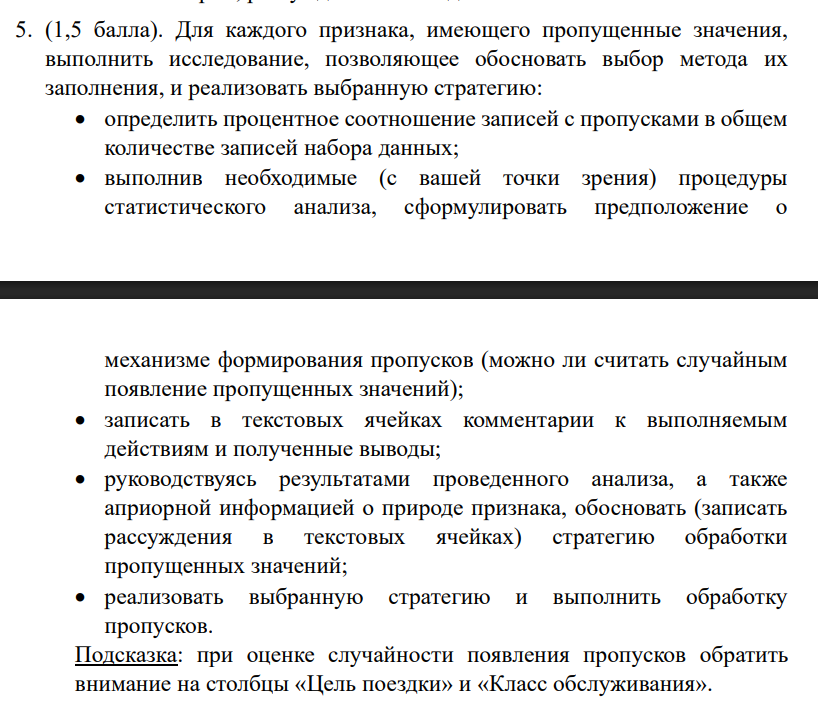

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   ID клиента                                                 1000 non-null   int64  
 1   Возраст                                                    897 non-null    float64
 2   Цель поездки                                               985 non-null    object 
 3   Класс обслуживания                                         1000 non-null   object 
 4   Уровень удовлетворенности онлайн-регистрацией на рейс      1000 non-null   int64  
 5   Уровень удовлетворенности обслуживанием в полете           1000 non-null   int64  
 6   Задержка отправления (мин)                                 1000 non-null   int64  
 7   Задержка прибытия (мин)                                    1000 non-null   float64
 8   Уровень удовле

Есть пропуски в столбцах "Возраст" и "Цель поездки"

В Возрасте у нас пропущено 1000 - 897 = 103 записи = 10.3 % данных

В цели поездки 1000 - 985 = 15 записей = 1.5 % данных

In [31]:
data.isnull().sum()

ID клиента                                                     0
Возраст                                                      103
Цель поездки                                                  15
Класс обслуживания                                             0
Уровень удовлетворенности онлайн-регистрацией на рейс          0
Уровень удовлетворенности обслуживанием в полете               0
Задержка отправления (мин)                                     0
Задержка прибытия (мин)                                        0
Уровень удовлетворенности временем отправления и прибытия      0
Уровень удовлетворенности клиента                              0
dtype: int64

In [32]:
data.isnull().sum()

ID клиента                                                     0
Возраст                                                      103
Цель поездки                                                  15
Класс обслуживания                                             0
Уровень удовлетворенности онлайн-регистрацией на рейс          0
Уровень удовлетворенности обслуживанием в полете               0
Задержка отправления (мин)                                     0
Задержка прибытия (мин)                                        0
Уровень удовлетворенности временем отправления и прибытия      0
Уровень удовлетворенности клиента                              0
dtype: int64

In [33]:
total_rows = len(data)
rows_with_missing = data.isnull().any(axis=1).sum()
missing_percentage = (rows_with_missing/total_rows) * 100
print(f"Доля строк с пропущенными значениями состовляет {missing_percentage:.2f}%")

Доля строк с пропущенными значениями состовляет 11.60%


In [34]:
cols = ["Возраст", "Цель поездки", "Класс обслуживания"]
combinated_cols = list(itertools.combinations(cols, 2))
for col1, col2 in combinated_cols:
    print(f"Проверка зависимости \"{col1}\" от \"{col2}\"")
    missin_by_purpose = data[data[col1].isnull()].groupby(col2).size()
    print(missin_by_purpose)

Проверка зависимости "Возраст" от "Цель поездки"
Цель поездки
Деловая    72
Частная    29
dtype: int64
Проверка зависимости "Возраст" от "Класс обслуживания"
Класс обслуживания
Бизнес     53
Комфорт    10
Эконом     40
dtype: int64
Проверка зависимости "Цель поездки" от "Класс обслуживания"
Класс обслуживания
Бизнес    15
dtype: int64


Возраст:
Различия между данными незначительно, что подтверждает гипотезу MCAR - пропуски не зависят от других данных

Цель поездки:
Все 15 пропусков отсятся к классу Бизнес что указывает на зависимость от Класса обслуживания. Это говорит о MNAR(пропуски не случайные)

In [35]:
age_median = data["Возраст"].median()
# print(age_median)
data["Возраст"].fillna(age_median, inplace=True)

C:\Users\NatalkaNerealka\AppData\Local\Temp\ipykernel_12884\781056393.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Возраст"].fillna(age_median, inplace=True)


In [36]:
buisness_mode = data[ data["Класс обслуживания"] == "Бизнес" ] [ "Цель поездки" ].mode()[0]
# data["Цель поездки"].fillna(buisness_mode, inplace=True)
data.loc[data['Класс обслуживания'] == 'Бизнес','Цель поездки'] = data.loc[data['Класс обслуживания'] == 'Бизнес','Цель поездки'].fillna(buisness_mode)

# Если бы у тебя было 2 параметры от которыз зависит цель поездки(Комфорт)
# comfort_mode = data[data["Класс обслуживания"] == "Комфорт"]["Цель поездки"].mode()[0]



In [37]:
data.loc[data['Класс обслуживания'] == 'Бизнес','Цель поездки'].isnull().sum()

np.int64(0)

In [38]:
data.loc[data['Цель поездки'].isna()]

,ID клиента,Возраст,Цель поездки,Класс обслуживания,Уровень удовлетворенности онлайн-регистрацией на рейс,Уровень удовлетворенности обслуживанием в полете,Задержка отправления (мин),Задержка прибытия (мин),Уровень удовлетворенности временем отправления и прибытия,Уровень удовлетворенности клиента


In [39]:
data.isnull().sum()

ID клиента                                                   0
Возраст                                                      0
Цель поездки                                                 0
Класс обслуживания                                           0
Уровень удовлетворенности онлайн-регистрацией на рейс        0
Уровень удовлетворенности обслуживанием в полете             0
Задержка отправления (мин)                                   0
Задержка прибытия (мин)                                      0
Уровень удовлетворенности временем отправления и прибытия    0
Уровень удовлетворенности клиента                            0
dtype: int64

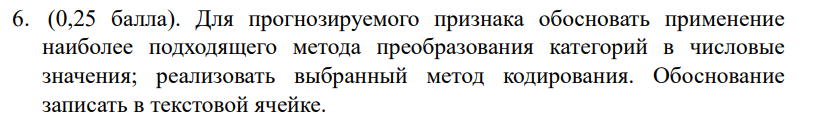

In [40]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

data['Уровень удовлетворенности клиента'] = le.fit_transform(data["Уровень удовлетворенности клиента"])
# data["Цель поездки"] = le.fit_transform(data["Цель поездки"])

# data = pd.get_dummies(data, columns=['Класс обслуживания'], drop_first=True)
data

,ID клиента,Возраст,Цель поездки,Класс обслуживания,Уровень удовлетворенности онлайн-регистрацией на рейс,Уровень удовлетворенности обслуживанием в полете,Задержка отправления (мин),Задержка прибытия (мин),Уровень удовлетворенности временем отправления и прибытия,Уровень удовлетворенности клиента
0,11996,52.0,Частная,Эконом,0,4,0,0.0,5,1
1,63021,30.0,Деловая,Бизнес,5,5,2,0.0,1,1
2,104939,40.0,Деловая,Бизнес,5,5,3,0.0,1,1
3,59058,71.0,Деловая,Эконом,2,2,3,11.0,2,0
4,13113,25.0,Деловая,Эконом,3,1,2,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...
995,67757,40.0,Деловая,Эконом,1,5,0,0.0,1,0
996,78741,46.0,Деловая,Бизнес,5,2,0,0.0,1,1
997,114209,45.0,Деловая,Бизнес,5,5,0,0.0,5,1
998,99262,29.0,Деловая,Бизнес,1,3,48,34.0,5,0


В соответствии с целью задачи, нам необходимо определить влияние некоторых факторов на удовлетворенность\неудовлетворенность клиентов. 


Поэтому мы кодируем все категориальные признаки, для точности вычислений. для бинарной классификации целесообразно использовать Label Encoding. One-Hot Encoding неуместно, так как для 2 категорий это создаст избыточность, а также 




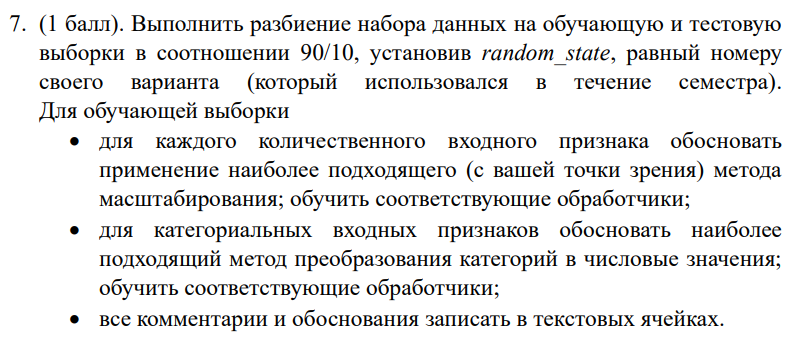

In [41]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split


X = data.drop(["ID клиента","Уровень удовлетворенности клиента"], axis=1)
y = data["Уровень удовлетворенности клиента"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

scaler = StandardScaler()



In [42]:
data.columns

Index(['ID клиента', 'Возраст', 'Цель поездки', 'Класс обслуживания',
       'Уровень удовлетворенности онлайн-регистрацией на рейс',
       'Уровень удовлетворенности обслуживанием в полете',
       'Задержка отправления (мин)', 'Задержка прибытия (мин)',
       'Уровень удовлетворенности временем отправления и прибытия',
       'Уровень удовлетворенности клиента'],
      dtype='object')


Для Цель поездки мы используем Label. Потому что 1) иерархия неважна 2) 2 признака


Для Класс обслуживания мы используем One-Hot. Потому что 1) Иерархия важна, и может влияет на зависимость 2) 3 признака

In [43]:
X_train["Цель поездки"] = le.fit_transform(X_train["Цель поездки"])
X_test["Цель поездки"] = le.transform(X_test["Цель поездки"])

X_train = pd.get_dummies(X_train, columns=['Класс обслуживания'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Класс обслуживания'], drop_first=True)

X_train

,Возраст,Цель поездки,Уровень удовлетворенности онлайн-регистрацией на рейс,Уровень удовлетворенности обслуживанием в полете,Задержка отправления (мин),Задержка прибытия (мин),Уровень удовлетворенности временем отправления и прибытия,Класс обслуживания_Комфорт,Класс обслуживания_Эконом
716,39.0,0,2,5,0,0.0,5,False,False
351,10.0,0,3,3,0,0.0,1,False,False
936,49.0,1,5,3,0,0.0,4,False,True
256,8.0,1,1,1,0,0.0,3,False,True
635,41.0,0,2,4,67,72.0,2,False,False
...,...,...,...,...,...,...,...,...,...
106,42.0,0,5,4,0,0.0,3,False,False
270,60.0,0,3,4,0,4.0,5,False,True
860,40.0,0,5,5,0,0.0,0,False,True
435,33.0,1,3,1,0,0.0,2,False,True


StandartScaler: 

Для колонок Возраст, Уровень удовлетворенности онлайн-регистрацией на рейс, Уровень удовлетворенности обслуживанием в полете, Уровень удовлетворенности временем отправления и прибытия мы работаем по StandartScaler. Почему? Потому что значения у нас варьируются в опредленном диапазоне, нет выбросов и без маштабирования они могут потерять вес в модели по сравнению с другими признакми.


RobustScaler:
Для колонок 'Задержка отправления (мин)', 'Задержка прибытия (мин)' так как есть выбросы, есть аномально большие значения

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, StandardScaler


robust_cols = [
    "Задержка отправления (мин)",
    "Задержка прибытия (мин)",
]

standart_cols = [
    "Возраст",
    "Уровень удовлетворенности онлайн-регистрацией на рейс",
    "Уровень удовлетворенности обслуживанием в полете",
    "Уровень удовлетворенности временем отправления и прибытия",
]

preprocessor = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standart_cols),
        ('robust', RobustScaler(), robust_cols)
    ],
    remainder="passthrough" # Оставляем категориальные без изменений
)

X_train_preproecssed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [45]:
pd.DataFrame(X_train_preproecssed)

,0,1,2,3,4,5,6,7,8
0,-0.100412,-0.972577,1.142714,1.297542,0.0,0.0,0,False,False
1,-2.177084,-0.235776,-0.526835,-1.314959,0.0,0.0,0,False,False
2,0.615681,1.237825,-0.526835,0.644417,0.0,0.0,1,False,True
3,-2.320303,-1.709377,-2.196385,-0.008708,0.0,0.0,1,False,True
4,0.042806,-0.972577,0.307939,-0.661834,5.583333,5.142857,0,False,False
...,...,...,...,...,...,...,...,...,...
895,0.114416,1.237825,0.307939,-0.008708,0.0,0.0,0,False,False
896,1.403384,-0.235776,0.307939,1.297542,0.0,0.285714,0,False,True
897,-0.028803,1.237825,1.142714,-1.968084,0.0,0.0,0,False,True
898,-0.530068,-0.235776,-2.196385,-0.661834,0.0,0.0,1,False,True


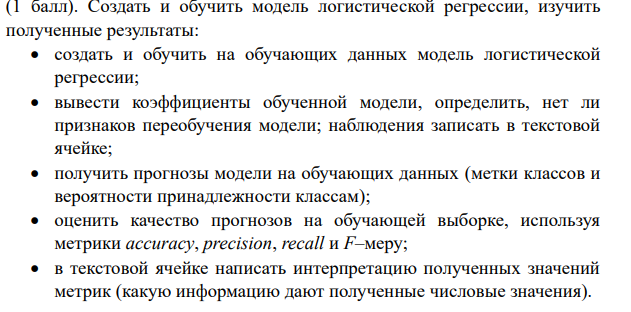

In [48]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=1000)
model.fit(X_train_preproecssed, y_train)
print("Коэффициенты модели:")
print(model.coef_[0])
print("Пересечение: ", model.intercept_[0])

Коэффициенты модели:
[ 0.24214289  1.11084956  0.74768809  0.0555651   0.09942973 -0.1226025
 -2.25298242 -0.61035382 -0.78735859]
Пересечение:  0.8765112191453684


Коэффициенты: [0.242, 1.110, 0.748, 0.056, 0.099, -0.123, -2.253, -0.610, -0.787]
- Первый (0.242): Возможно, "Возраст" — слабый положительный фактор (чем старше, тем чуть выше вероятность удовлетворения).
- Второй (1.110): Сильный положительный вклад, вероятно, "Уровень удовлетворенности онлайн-регистрацией на рейс".
- Третий (0.748): Ещё один положительный, возможно, "Уровень удовлетворенности обслуживанием в полете".
- Четвёртый и пятый (0.056, 0.099): Малый вклад, возможно,"Уровень удовлетворенности временем отправления и прибытия" и "Задержка отправления (мин)"
- Шестой (-0.123): Незначительный отрицательный, может быть "Задержка прибытия (мин)".
- Седьмой (-2.253): Сильный отрицательный, вероятно, "Цель поездки"
- Восьмой (-0.610): Отрицательный, возможно, "Класс обслуживания_Бизнес" (по сравнению с "Эконом" как базой).
- Девятый (-0.787): Ещё более отрицательный, вероятно, "Класс обслуживания_Комфорт".

Пересечение (0.876): Базовый логарифм шансов, когда все признаки = 0.

Оценка переобучения: Пока рано делать выводы только по обучающей выборке. Если метрики на тесте сильно ниже (например, >0.1 разницы), это может указывать на переобучение. Сравним позже с тестом.

In [ ]:
X_train["Цель поездки"] = le.fit_transform(X_train["Цель поездки"])
X_test["Цель поездки"] = le.transform(X_test["Цель поездки"])

X_train = pd.get_dummies(X_train, columns=['Класс обслуживания'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Класс обслуживания'], drop_first=True)

X_train

,Возраст,Цель поездки,Уровень удовлетворенности онлайн-регистрацией на рейс,Уровень удовлетворенности обслуживанием в полете,Задержка отправления (мин),Задержка прибытия (мин),Уровень удовлетворенности временем отправления и прибытия,Класс обслуживания_Комфорт,Класс обслуживания_Эконом
716,39.0,0,2,5,0,0.0,5,False,False
351,10.0,0,3,3,0,0.0,1,False,False
936,49.0,1,5,3,0,0.0,4,False,True
256,8.0,1,1,1,0,0.0,3,False,True
635,41.0,0,2,4,67,72.0,2,False,False
...,...,...,...,...,...,...,...,...,...
106,42.0,0,5,4,0,0.0,3,False,False
270,60.0,0,3,4,0,4.0,5,False,True
860,40.0,0,5,5,0,0.0,0,False,True
435,33.0,1,3,1,0,0.0,2,False,True


In [58]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


def logistic_metrics(X, y):
    y_train_pred = model.predict(X)
    # y_train_prob = model.predict_proba(X_train_preproecssed)[:, 1]
    accuracy = accuracy_score(y, y_train_pred)
    precision = precision_score(y, y_train_pred)
    recall = recall_score(y, y_train_pred)
    f1 = f1_score(y, y_train_pred)
    print("Метрики по выборке:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"Наблюдения:")


logistic_metrics(X_train_preproecssed, y_train)

Метрики по выборке:
Accuracy: 0.831
Precision: 0.830
Recall: 0.830
F1-score: 0.830
Наблюдения:


Accuracy (0.831): 83.1% предсказаний верны. Хороший показатель, но зависит от сбалансированности классов.

Precision (0.830): 83% предсказанных "Удовлетворен" были правильными. Указывает на низкий уровень ложно положительных.

Recall (0.830): 83% реальных "Удовлетворен" найдены. Хорошая способность выявлять положительный класс.

F1-score (0.830): Баланс между precision и recall, что говорит о стабильности модели.

Интерпретация: Метрики высокие и равны, что может указывать на сбалансированные классы или хорошую подгонку модели. Однако это только на обучающей выборке — нужно проверить на тесте.

Коэффициенты: "Цель поездки" (-2.253) — самый сильный отрицательный фактор, что логично, так как поездки в подавляющем большинстве >70% деловые, а не частные. "Уровень удовлетворенности онлайн-регистрацией на рейс" (1.110) — сильный положительный, вероятно, людям нравится проходить регистрацию на рейс онлайн.

Переобучение: Пока нет переобучения, если метрики на тесте будут близки. Если разница >0.1, модель переобучена.

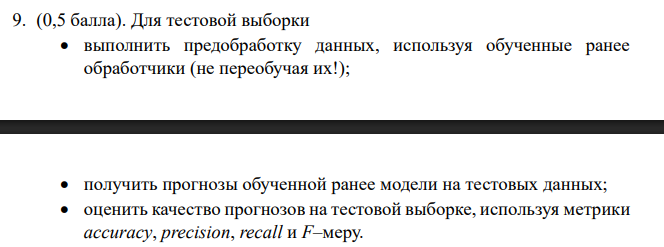

In [60]:
print("Тестовая выборка")
logistic_metrics(X_test_preprocessed, y_test)



Тестовая выборка
Метрики по выборке:
Accuracy: 0.800
Precision: 0.833
Recall: 0.769
F1-score: 0.800
Наблюдения:


Accuracy (0.800): 80% предсказаний верны. Немного ниже, чем на обучающей (0.831), что нормально, так как тест — независимая выборка.

Precision (0.833): 83.3% предсказанных "Удовлетворен" верны. Выше, чем recall, что говорит о меньшем числе ложно положительных.

Recall (0.769): 76.9% реальных "Удовлетворен" найдены. Ниже precision, указывает на ложно отрицательные (некоторые удовлетворённые клиенты не распознаны).

F1-score (0.800): Баланс между precision и recall, что отражает общую эффективность модели.

Сравнение с обучающей выборкой (0.831, 0.830, 0.830, 0.830):

Разница в Accuracy: 0.031 (3.1%), что приемлемо и не указывает на сильное переобучение.

Precision выше на тесте, Recall ниже — возможно, модель более осторожна с предсказанием "Удовлетворен".


Обобщающая способность: Разница между обучающей и тестовой выборками небольшая (менее 0.1), что говорит о хорошей обобщающей способности модели. Нет явного переобучения.

Слабые места: Низкий recall (0.769) может указывать на пропуск части удовлетворённых клиентов. Это может быть связано с дисбалансом классов или недостатком данных.

Дальнейшие шаги: Можно проверить порог вероятности (из predict_proba) или сбалансировать классы.

# Что такое переобучение? [Теория]
Переобучение (overfitting) происходит, когда модель слишком хорошо адаптируется к обучающим данным, запоминая шум и специфические детали, вместо того чтобы улавливать общие закономерности. Это приводит к тому, что модель плохо работает на новых (тестовых) данных. Разница между метриками на обучающей и тестовой выборках — один из ключевых индикаторов переобучения.

При каком проценте разницы считается сильное переобучение?

-Нет строгого универсального порога, но в практике машинного обучения принято ориентироваться на следующие ориентиры:

1. Малая разница (< 5%, или 0.05):
- Разница в метриках (например, Accuracy) менее 5% указывает на хорошую обобщающую способность модели. Пример: Accuracy на обучении 0.85, на тесте 0.82 — нормально.
2. Средняя разница (5–10%, или 0.05–0.10):
- Разница в диапазоне 5–10% может сигнализировать о лёгком переобучении. Модель немного лучше работает на обучении, но всё ещё обобщает приемлемо. Пример: Accuracy 0.85 на обучении, 0.78 на тесте — стоит проверить данные или параметры.
3. Сильное переобучение (> 10%, или 0.10):
- Разница более 10% считается значительной и указывает на сильное переобучение. Модель запомнила обучающие данные и плохо справляется с новыми. Пример: Accuracy 0.90 на обучении, 0.75 на тесте — явный признак переобучения.